# **Polinomial Logistic Regression**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('moonDataset.csv')

In [8]:
data.head()

,X1,X2,X3,label
0,-0.926767,-0.111073,0.086017,0
1,-0.917583,0.706006,0.058041,0
2,0.437984,0.899093,0.072543,0
3,0.089694,0.291446,0.070444,1
4,0.110672,-0.070806,-0.090376,1


<Axes: xlabel='X1', ylabel='X2'>

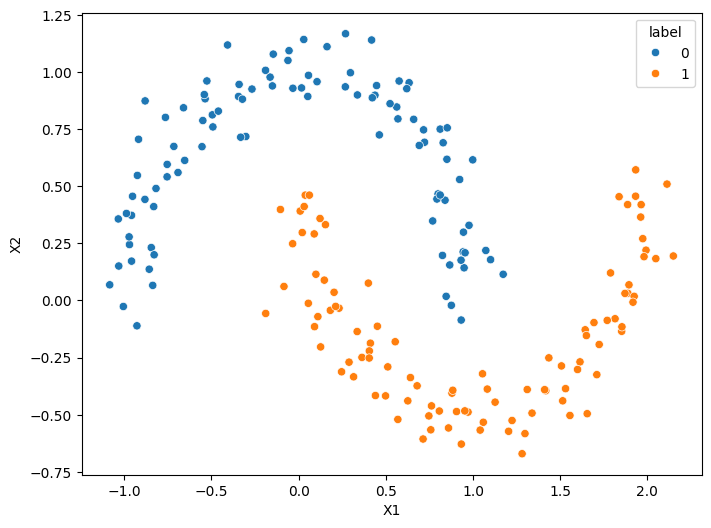

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = data.X1,y=data.X2,hue=data.label,sizes=100)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
X,y = data.iloc[:,:2].values,data.label.values

In [26]:
Model = LogisticRegression()
Model.fit(X,y)

LogisticRegression()

<Axes: >

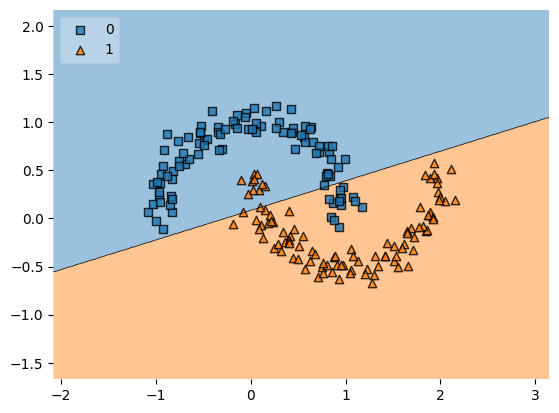

In [27]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), Model, legend=2)

In [32]:
y_pred = Model.predict(X)
acc = accuracy_score(y,y_pred)
print('Accuracy Score is:',acc)

Accuracy Score is: 0.87


In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [65]:
Model_2 = LogisticRegression()
Model_2.fit(X_trf,y)
y_pred = Model_2.predict(X_trf)
acc = accuracy_score(y_pred,y)
print('Accuracy Score is:',acc)

Accuracy Score is: 0.97


In [66]:
def plot_decision_boundary(X,y,degree=1):

    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    Model = LogisticRegression()
    Model.fit(X_trf,y)
    y_pred = Model.predict(X_trf)
    accuracy = accuracy_score(y_pred,y)

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=Model.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

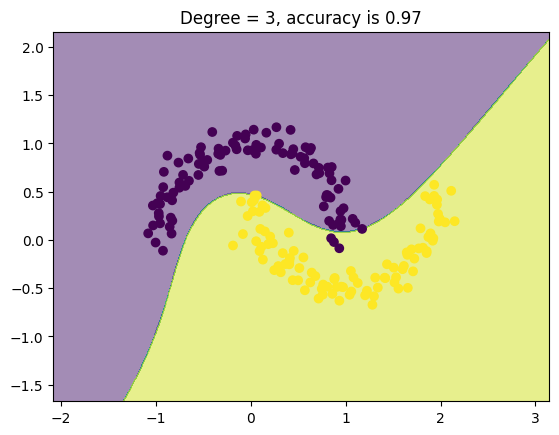

In [67]:
# Plinomial Logistic Regression with 3 degrees
plot_decision_boundary(X,y,3)

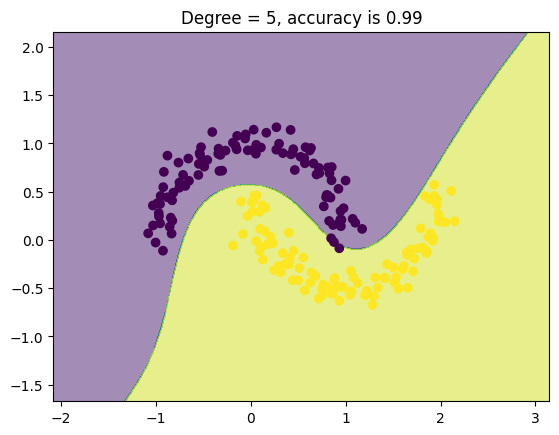

In [74]:
# Plinomial Logistic Regression with 5 degrees
plot_decision_boundary(X,y,5)

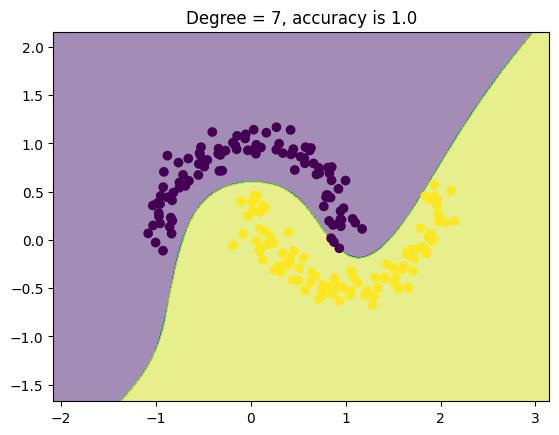

In [75]:
# Plinomial Logistic Regression with 7 degrees
plot_decision_boundary(X,y,7)

Now we have archived highest Accuracy: